Submitted by:  
Saurabh Kumar  
SC22B146

# Line Fitting Techniques

In this assignment, we will explore various line fitting techniques, understanding their implementation, strengths, and weaknesses.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as stats

Complete the following functions:

In [ ]:
class LineFittingAssignment:
    def __init__(self, seed=42):
        """
        Initialize the assignment with a random seed for reproducibility
        """
        np.random.seed(seed)
    
    def generate_data(self, n_points=50, noise_std=0.5, outlier_ratio=0.1):
        """
        Generate synthetic data for line fitting experiments
        
        Parameters:
        -----------
        n_points : int, number of data points
        noise_std : float, standard deviation of Gaussian noise
        outlier_ratio : float, proportion of outlier points
        
        Returns:
        --------
        x : numpy array of x coordinates
        y : numpy array of y coordinates
        """
        # TODO: Implement this method
        # 1. Create a true line with some slope and intercept
        # 2. Add Gaussian noise to the points
        # 3. Introduce outliers randomly
        
        # Hint: 
        # - Use np.linspace for x values
        # - True line: y = mx + b + noise
        # - For outliers, add some points far from the main trend

        x = np.linspace(0, 10, n_points)
        true_slope = 3.0
        true_intercept = 2.0
        noise = np.random.normal(0, noise_std, size=n_points)
        y = true_slope * x + true_intercept + noise

        # Outliers
        n_outliers = int(outlier_ratio * n_points)
        outlier_indices = np.random.choice(n_points, n_outliers, replace=False)
        y[outlier_indices] += np.random.normal(10, 5, size=n_outliers) 

        return x, y
        
        # raise NotImplementedError("Complete the generate_data method")
    
    def least_squares_fit(self, x, y):
        """
        Perform Ordinary Least Squares (OLS) line fitting
        
        Parameters:
        -----------
        x : numpy array of x coordinates
        y : numpy array of y coordinates
        
        Returns:
        --------
        slope : float, estimated line slope
        intercept : float, estimated line intercept
        """
        # TODO: Implement least squares line fitting
        # Use numpy's polyfit or manual calculation using linear algebra
        
        slope, intercept = np.polyfit(x, y, 1)
        return slope, intercept

        # raise NotImplementedError("Complete the least_squares_fit method")
    
    def total_least_squares_fit(self, x, y):
        """
        Perform Total Least Squares (TLS) line fitting
        
        Parameters:
        -----------
        x : numpy array of x coordinates
        y : numpy array of y coordinates
        
        Returns:
        --------
        slope : float, estimated line slope
        intercept : float, estimated line intercept
        """
        # TODO: Implement total least squares fitting
        # Hint: Use SVD decomposition to find the line
        # Minimize perpendicular distance from points to the line
        
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        X = np.vstack((x - x_mean, y - y_mean)).T
        _, _, Vt = np.linalg.svd(X)
        direction = Vt[-1]

        # TLS line equation: (y - y_mean) = (dy/dx)(x - x_mean)
        slope = -direction[0] / direction[1]
        intercept = y_mean - slope * x_mean
        return slope, intercept

        # raise NotImplementedError("Complete the total_least_squares_fit method")
    
    def ransac_line_fitting(self, x, y, n_iterations=100, threshold=0.5):
        """
        Perform RANSAC (Random Sample Consensus) line fitting
        
        Parameters:
        -----------
        x : numpy array of x coordinates
        y : numpy array of y coordinates
        n_iterations : int, number of RANSAC iterations
        threshold : float, inlier threshold distance
        
        Returns:
        --------
        best_slope : float, RANSAC estimated line slope
        best_intercept : float, RANSAC estimated line intercept
        inlier_mask : boolean array, mask of inlier points
        """
        # TODO: Implement RANSAC line fitting
        # Steps:
        # 1. Randomly sample minimal subset of points
        # 2. Fit a line to the subset
        # 3. Count inliers within threshold
        # 4. Repeat and keep the best model
        
        best_inliers = []
        best_model = (0, 0)

        for _ in range(n_iterations):
            indices = np.random.choice(len(x), 2, replace=False)
            x_sample, y_sample = x[indices], y[indices]

            # Fit line through 2 points
            if x_sample[1] - x_sample[0] == 0:
                continue  # Avoiding division by zero

            slope = (y_sample[1] - y_sample[0]) / (x_sample[1] - x_sample[0])
            intercept = y_sample[0] - slope * x_sample[0]

            # Compute distances of all points from line
            distances = np.abs(slope * x - y + intercept) / np.sqrt(slope**2 + 1)
            inliers = distances < threshold

            if np.sum(inliers) > np.sum(best_inliers):
                best_inliers = inliers
                best_model = (slope, intercept)

        return best_model[0], best_model[1], best_inliers

        # raise NotImplementedError("Complete the ransac_line_fitting method")
    
    def visualize_results(self, x, y, methods):
        """
        Visualize line fitting results from different methods
        
        Parameters:
        -----------
        x : numpy array of x coordinates
        y : numpy array of y coordinates
        methods : dict of {method_name: (slope, intercept)}
        """
        plt.figure(figsize=(12, 6))
        plt.scatter(x, y, label='Data Points', alpha=0.7)
        
        for name, (slope, intercept) in methods.items():
            y_pred = slope * x + intercept
            plt.plot(x, y_pred, label=f'{name} Fit', linewidth=2)
        
        plt.title('Line Fitting Comparison')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
    
    def run_assignment(self):
        """
        Run the complete line fitting experiment
        """
        # Generate data
        x, y = self.generate_data()
        
        # Perform different line fitting methods
        methods = {
            'Least Squares': self.least_squares_fit(x, y),
            'Total Least Squares': self.total_least_squares_fit(x, y),
            'RANSAC': self.ransac_line_fitting(x, y)[:2]
        }
        
        # Visualize results
        self.visualize_results(x, y, methods)


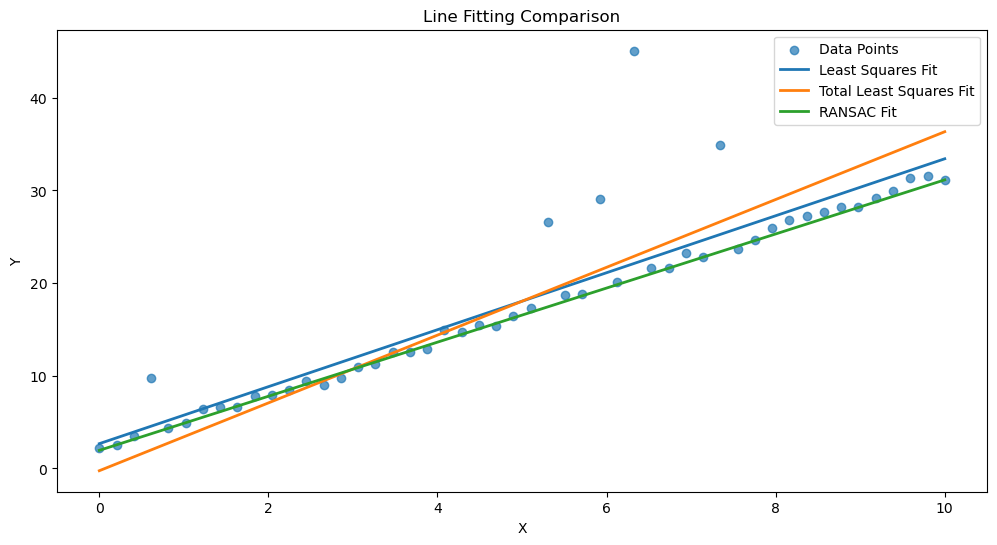

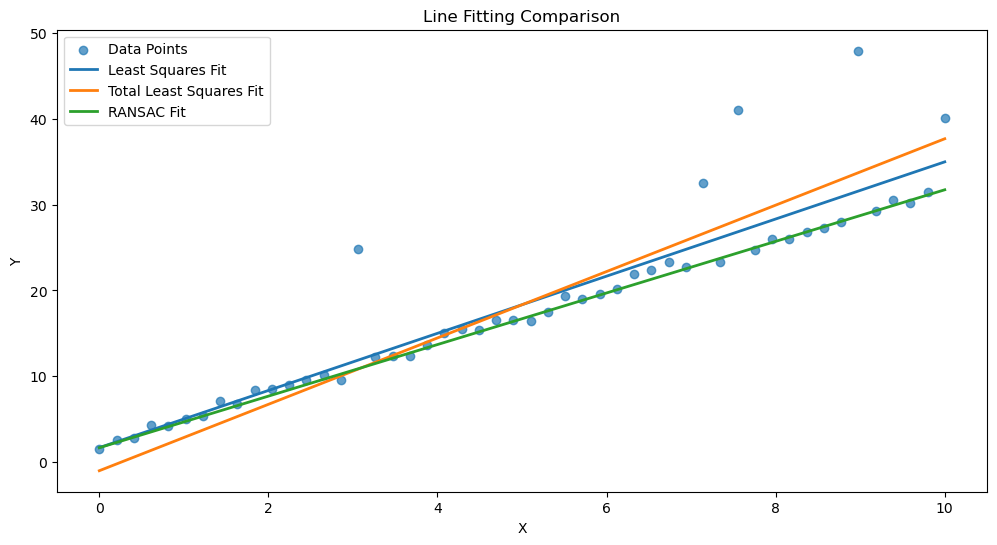

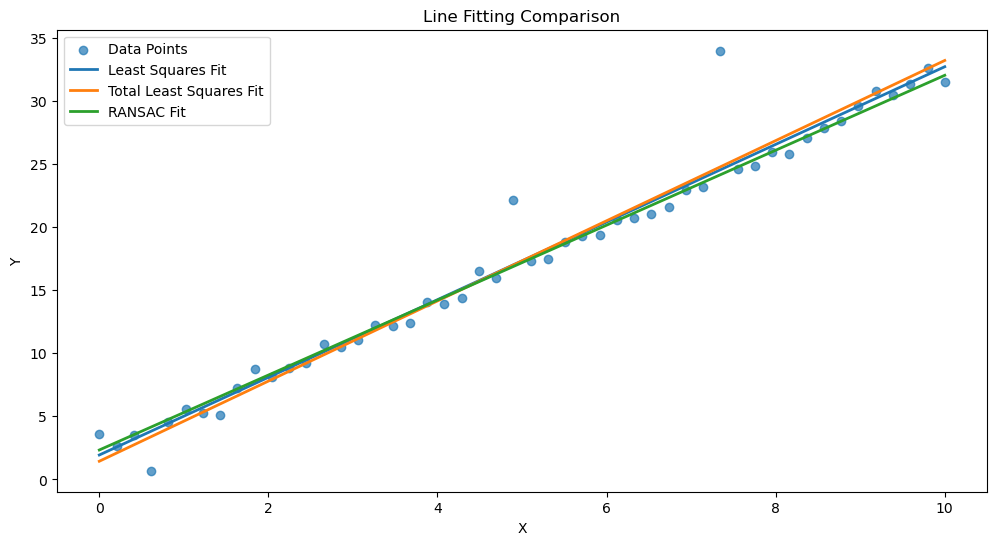

In [7]:
# Example Usage
assignment = LineFittingAssignment()
assignment.run_assignment()
assignment.run_assignment()
assignment.run_assignment()